In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [85]:
df = pd.read_csv("resources/data/discords/dutch_power/power_data.txt",header=None,names=['consumption'])

In [86]:
df.head()

consumption
0          950
1          939
2          943
3          971
4         1014

In [87]:
num_values = "num_values: %d"%(df.shape[0])
print num_values

num_values: 35040


In [88]:
dates = pd.date_range('1/1/1997', periods=35040, freq='15Min')

In [89]:
df =df.set_index(dates)
df.head()

consumption
1997-01-01 00:00:00          950
1997-01-01 00:15:00          939
1997-01-01 00:30:00          943
1997-01-01 00:45:00          971
1997-01-01 01:00:00         1014

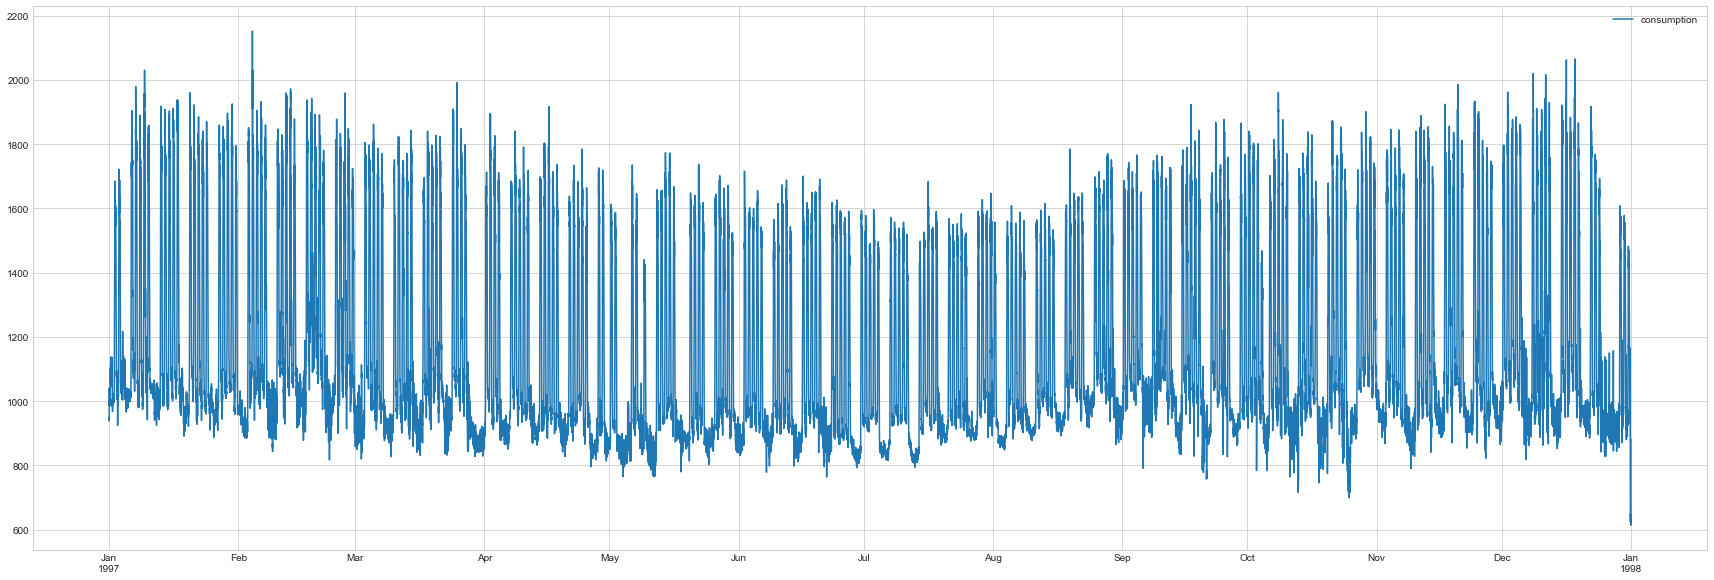

In [90]:
df.plot(figsize=(30,10))
plt.show()

In [91]:
#drop days from 1 to 5 jan to start from a monday.
df = df['1997-01-06':]
#add anomaly column
df['anomaly'] = 0
df.head()

consumption  anomaly
1997-01-06 00:00:00         1008        0
1997-01-06 00:15:00         1001        0
1997-01-06 00:30:00         1009        0
1997-01-06 00:45:00         1009        0
1997-01-06 01:00:00         1001        0

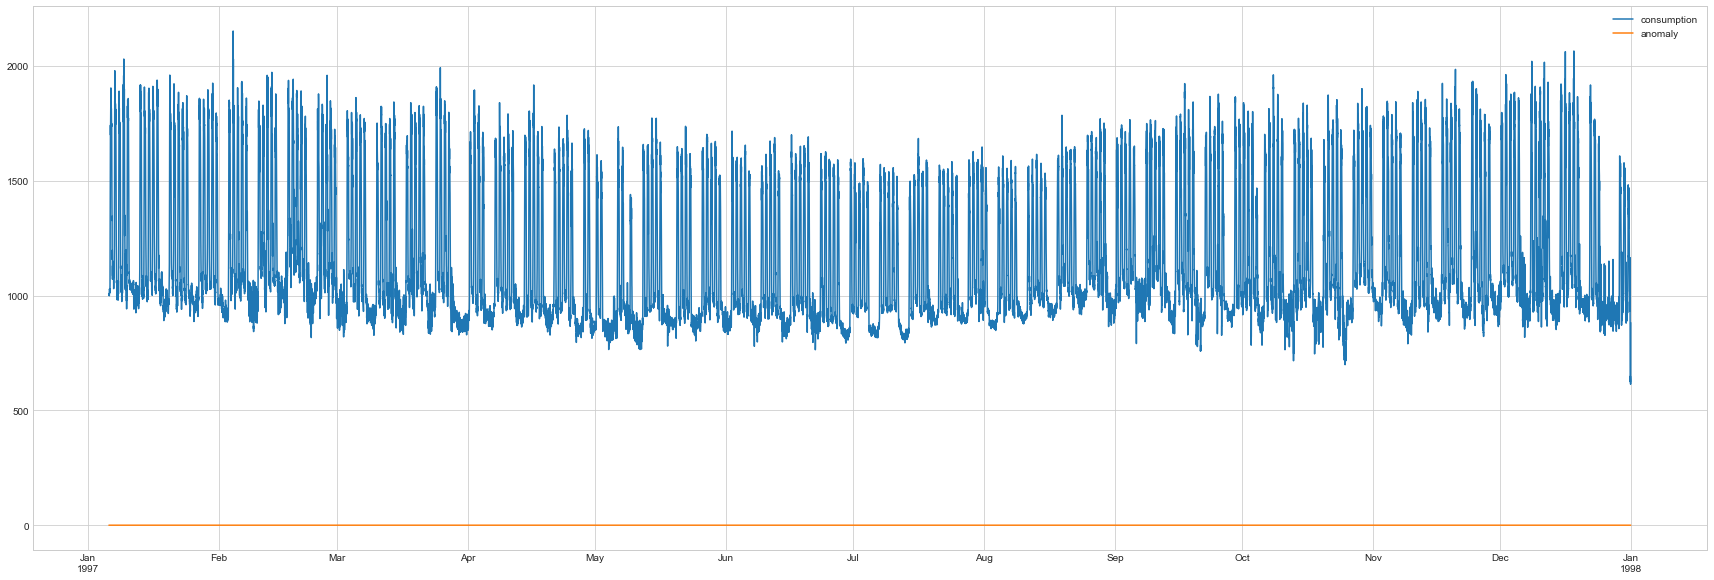

In [92]:
df.plot(figsize=(30,10))
plt.show()

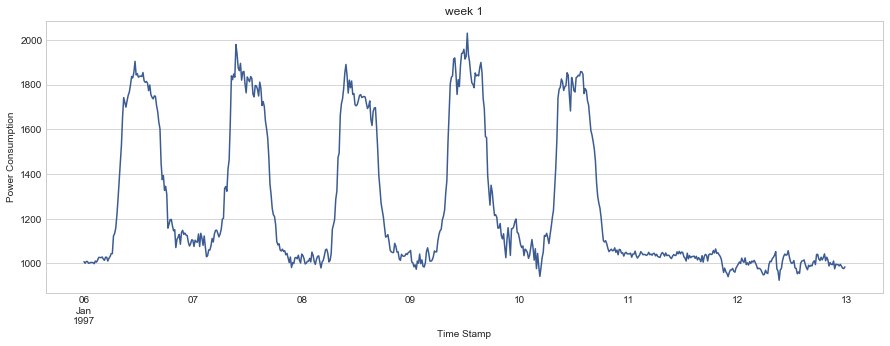

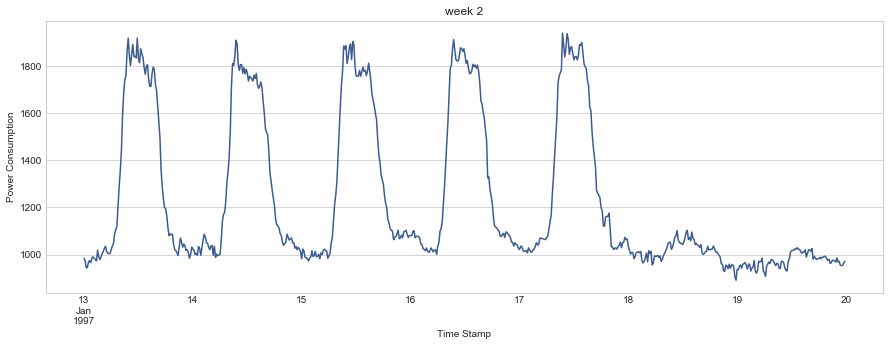

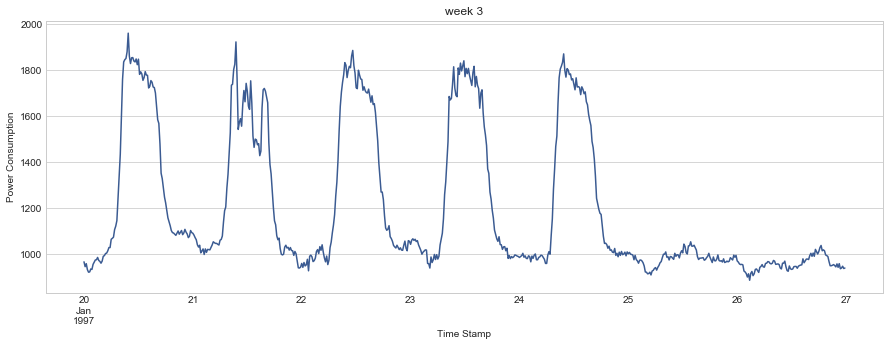

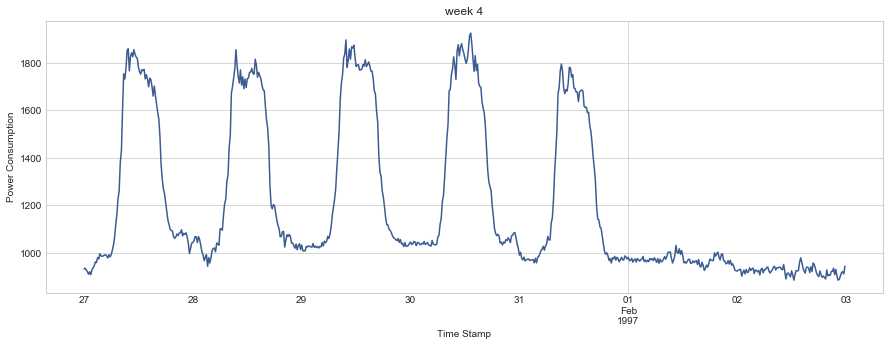

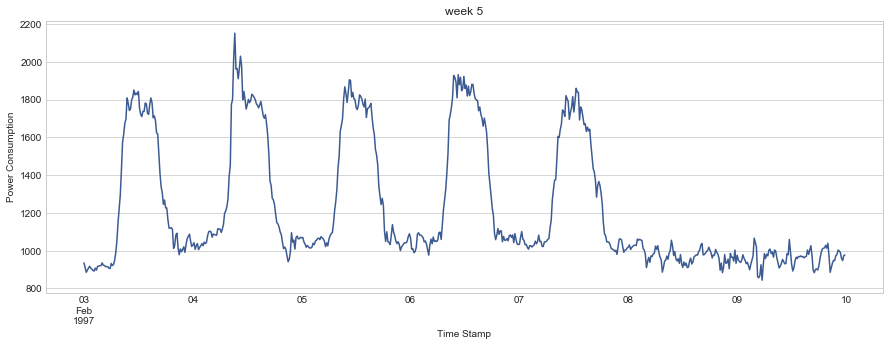

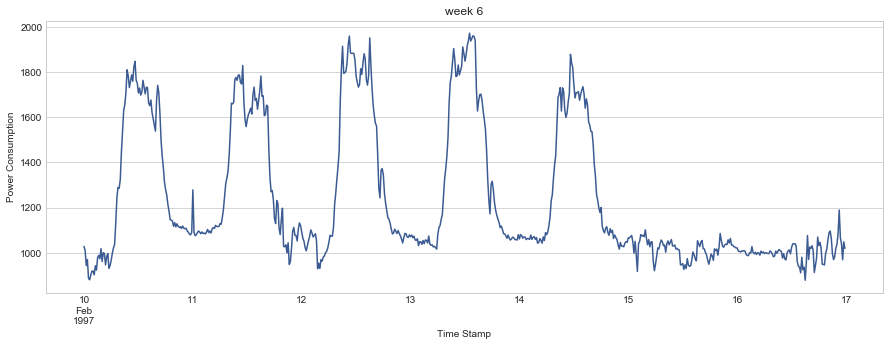

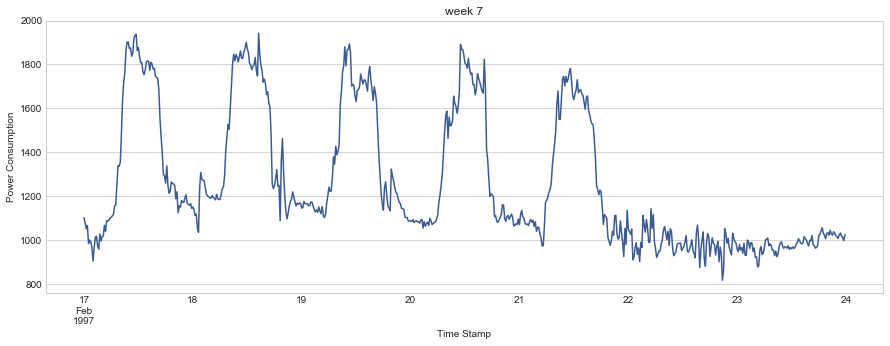

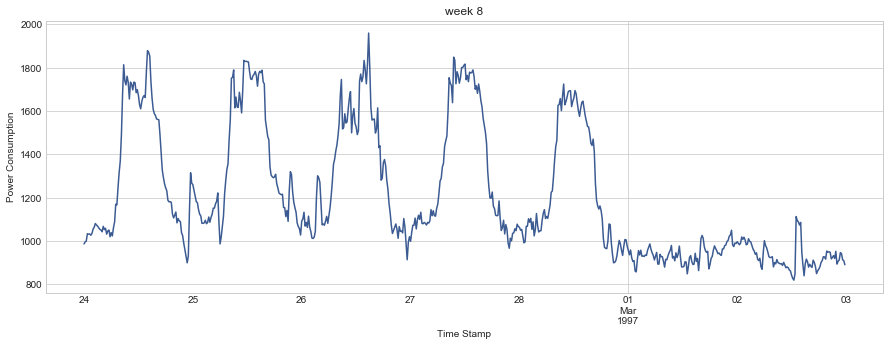

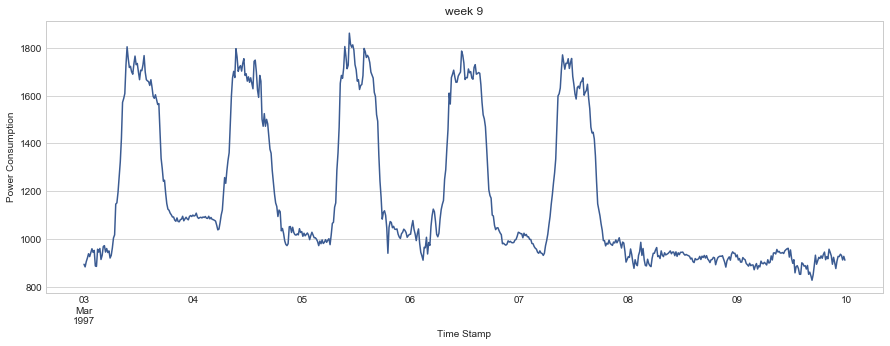

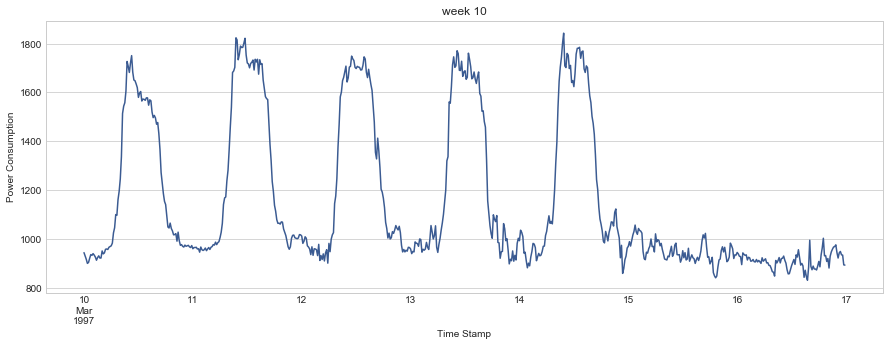

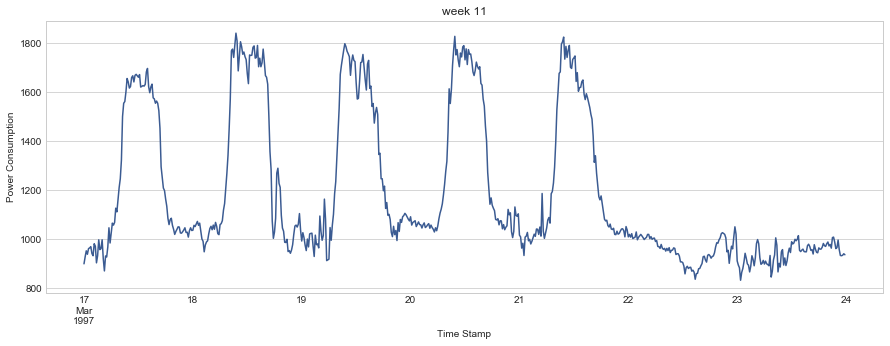

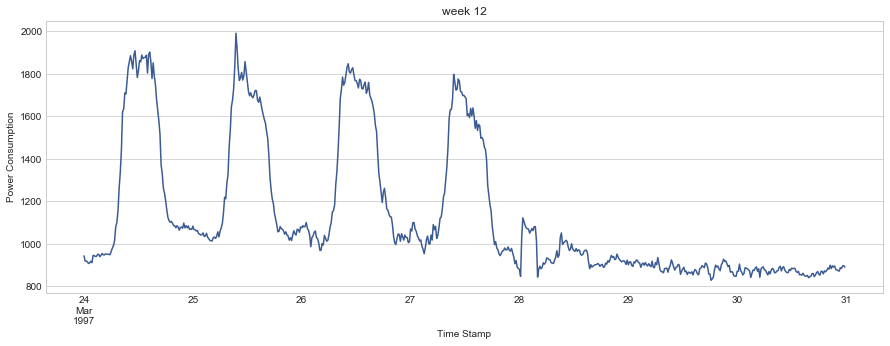

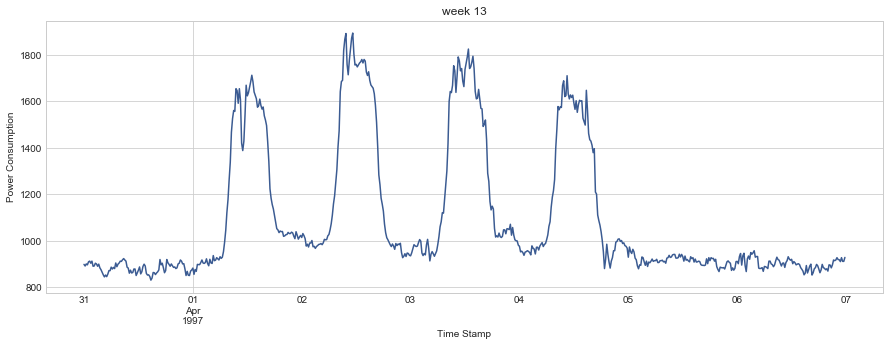

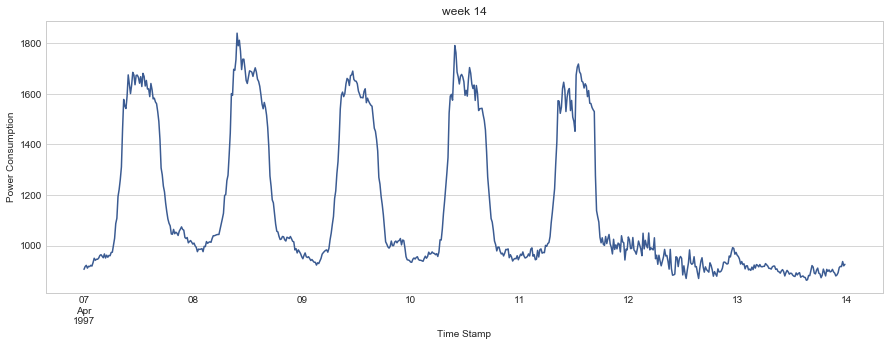

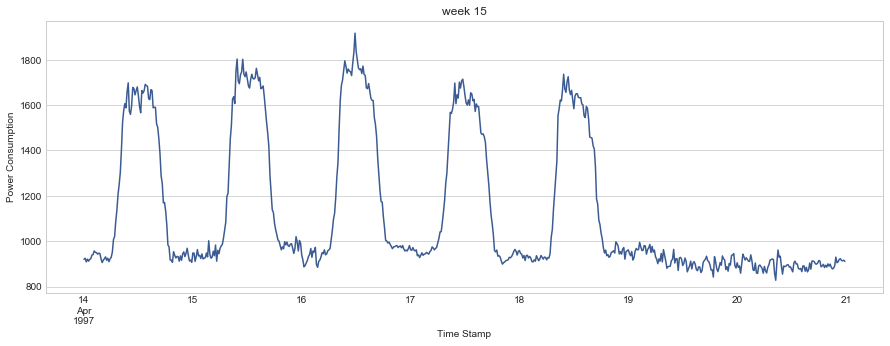

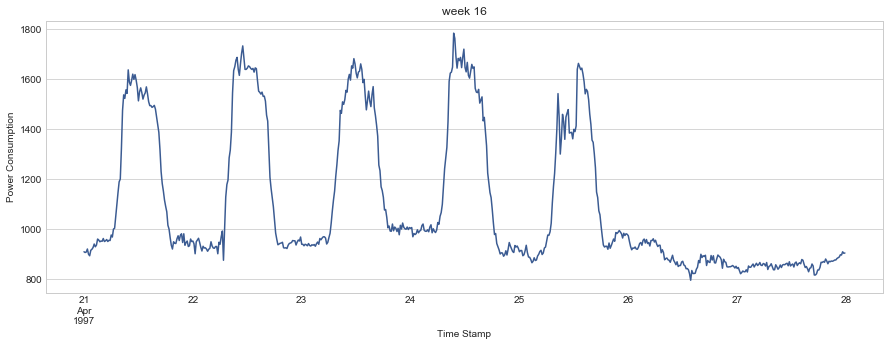

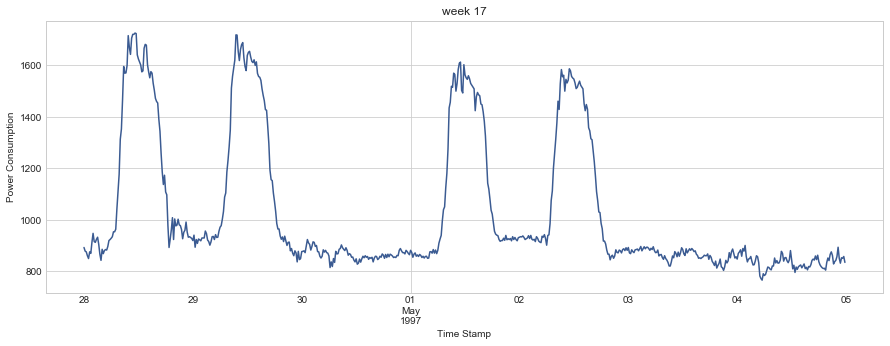

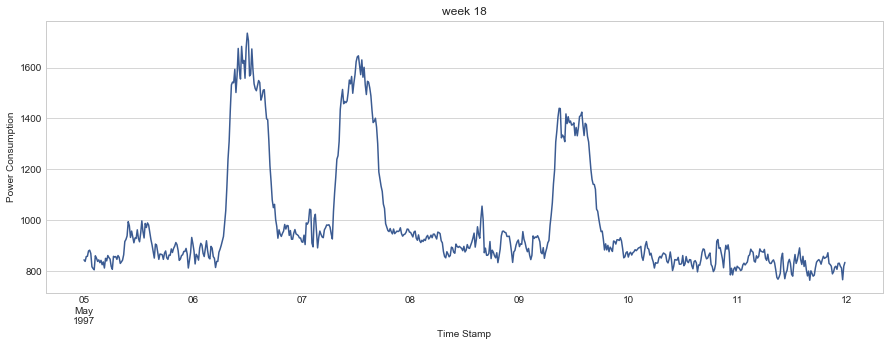

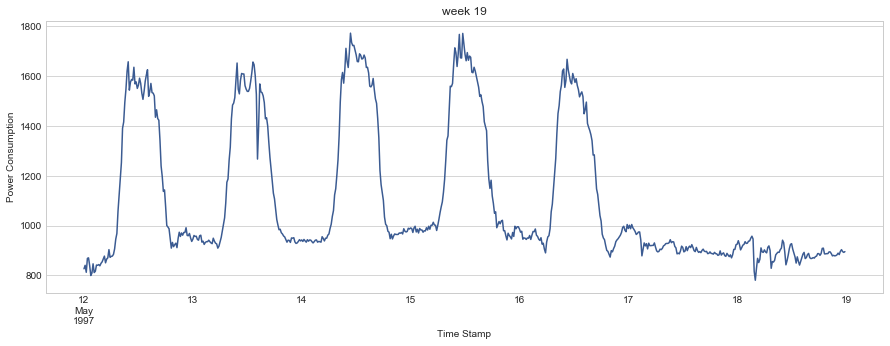

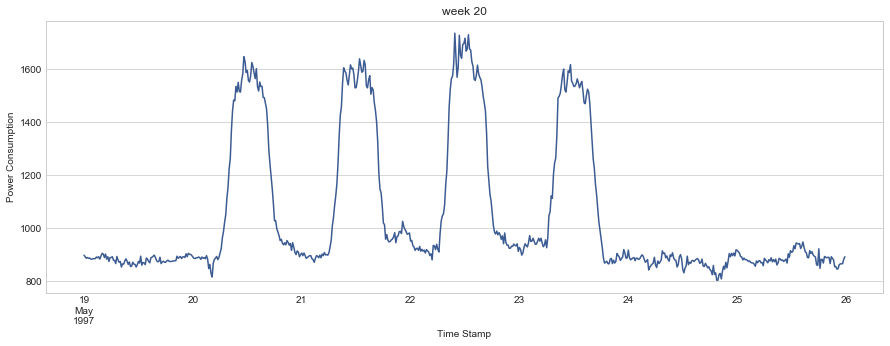

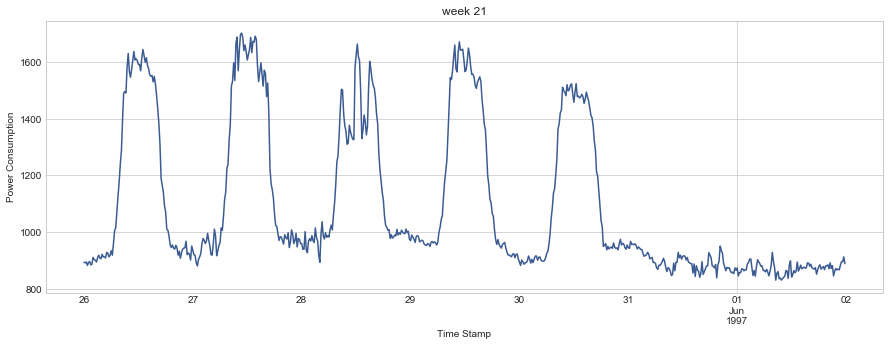

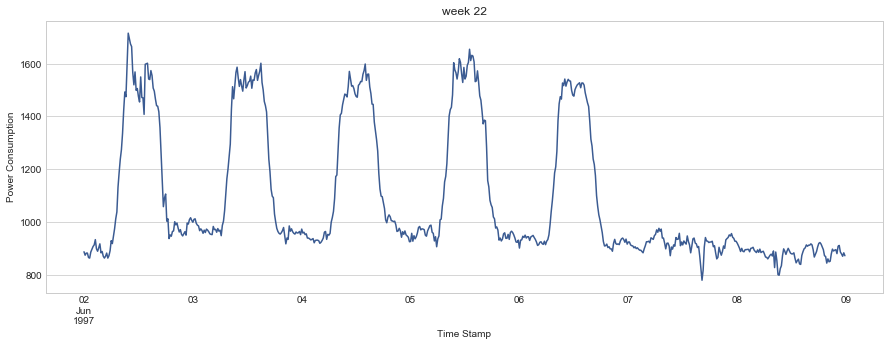

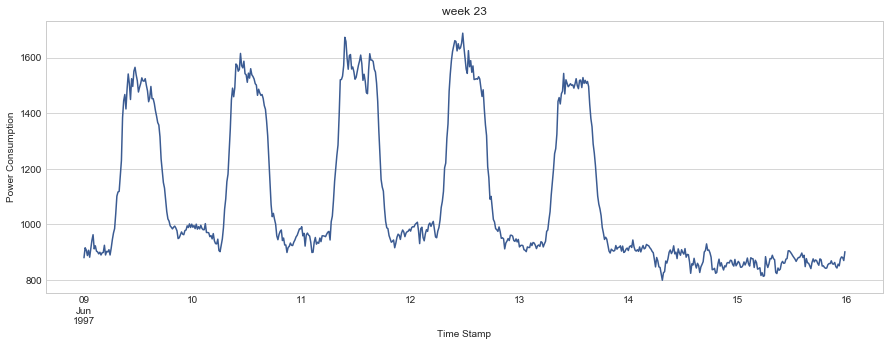

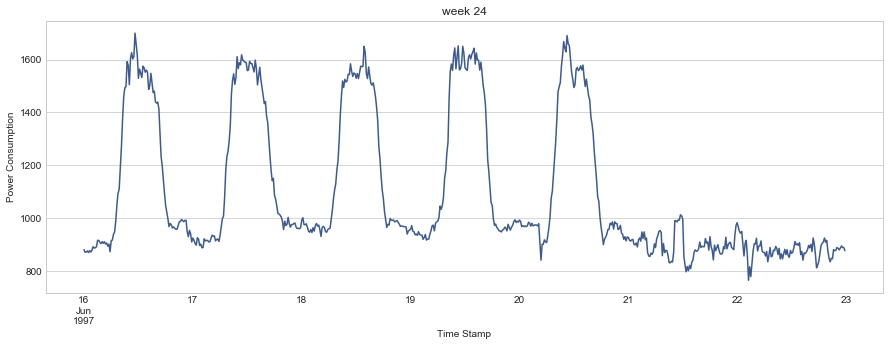

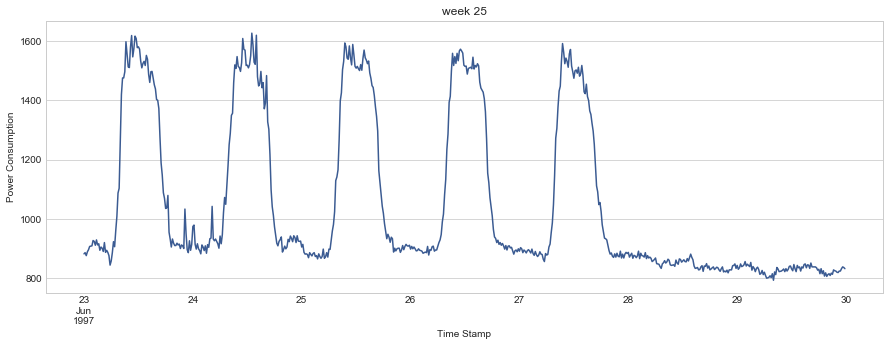

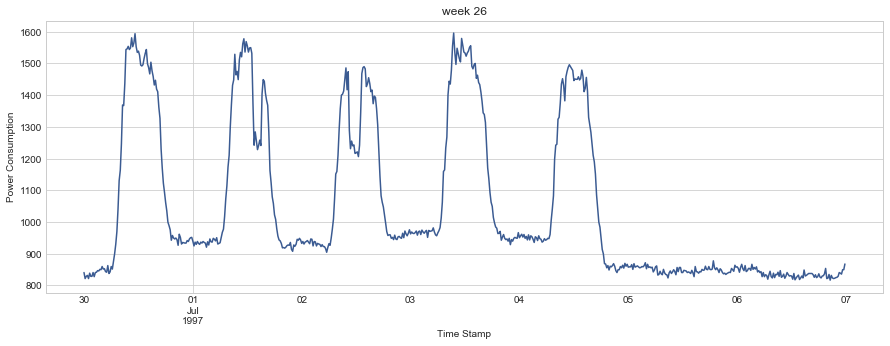

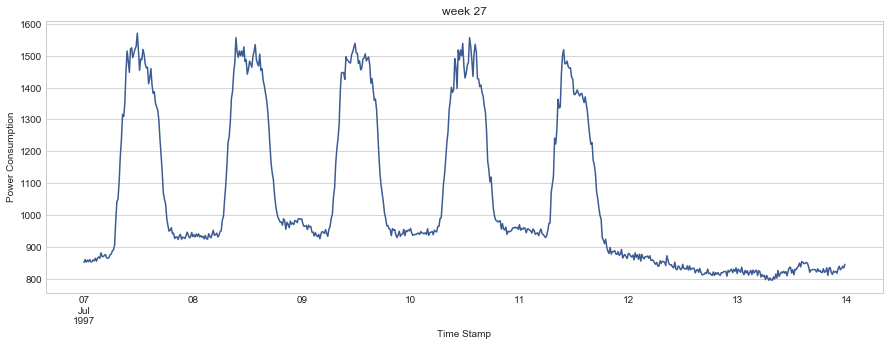

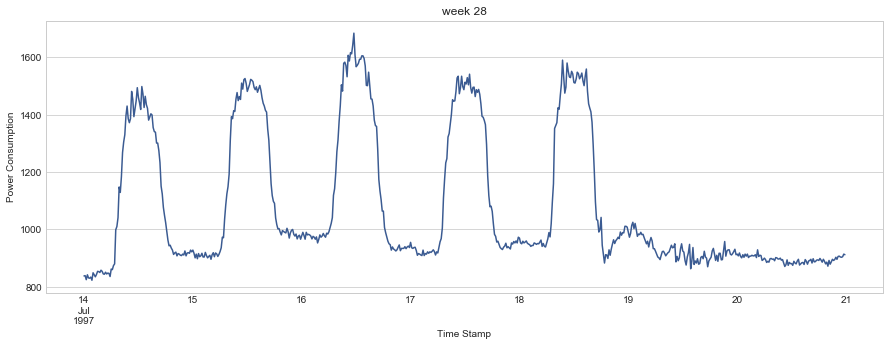

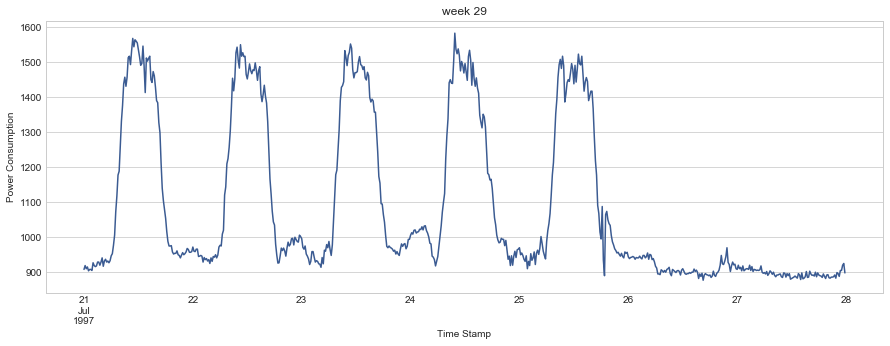

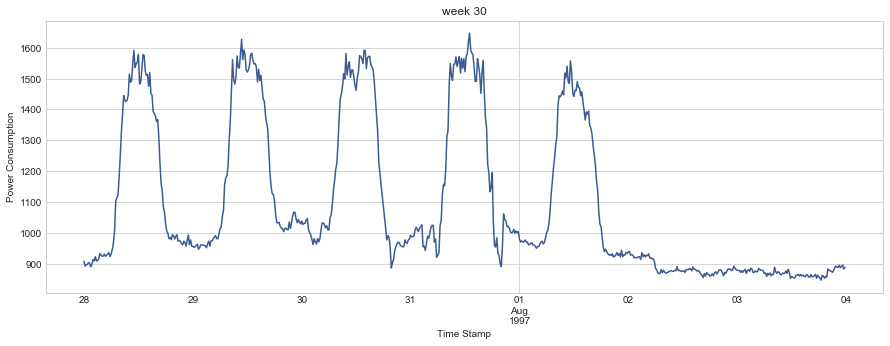

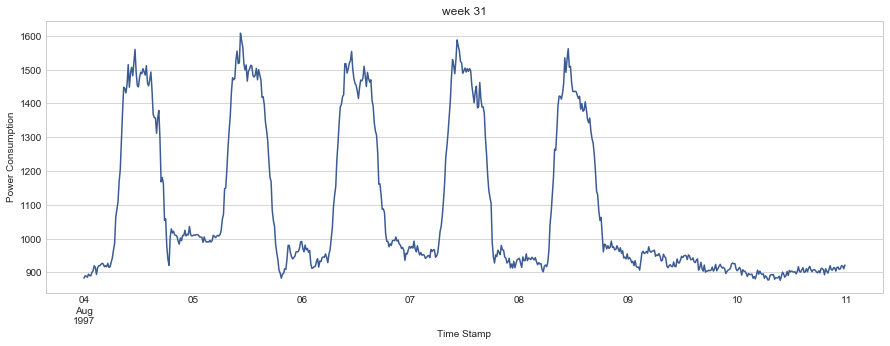

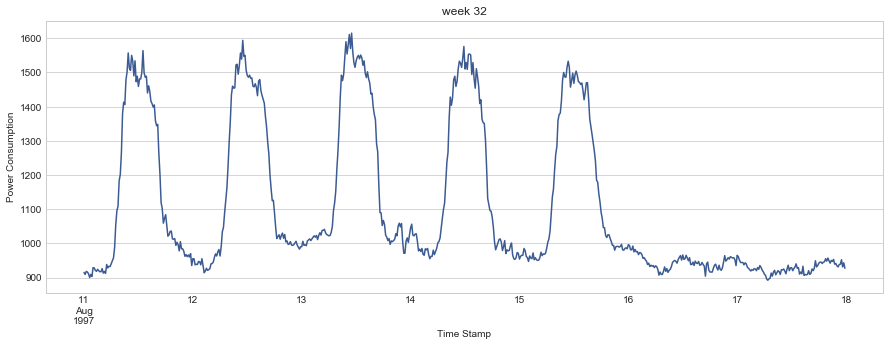

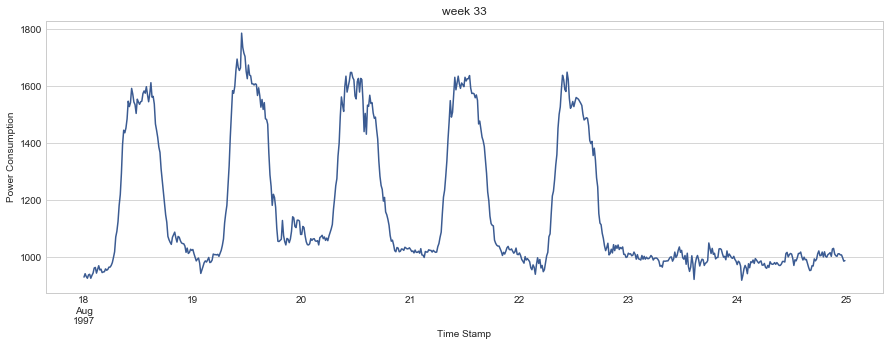

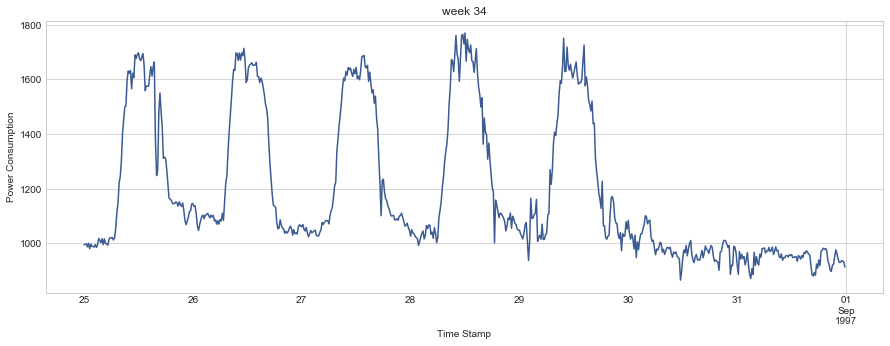

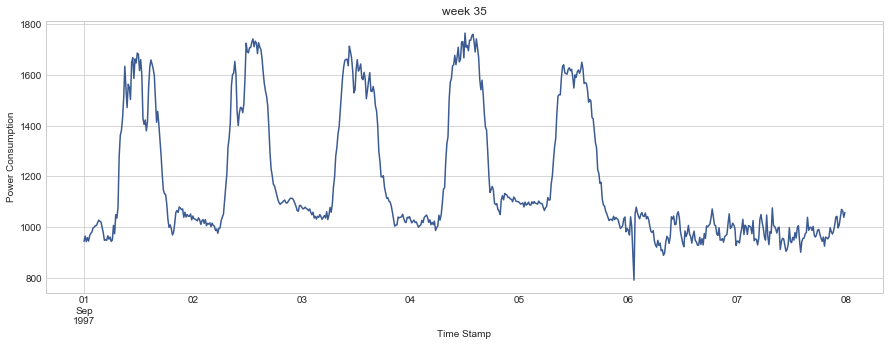

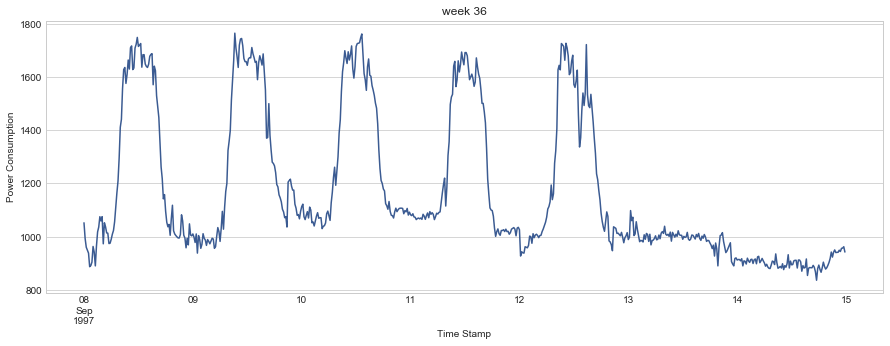

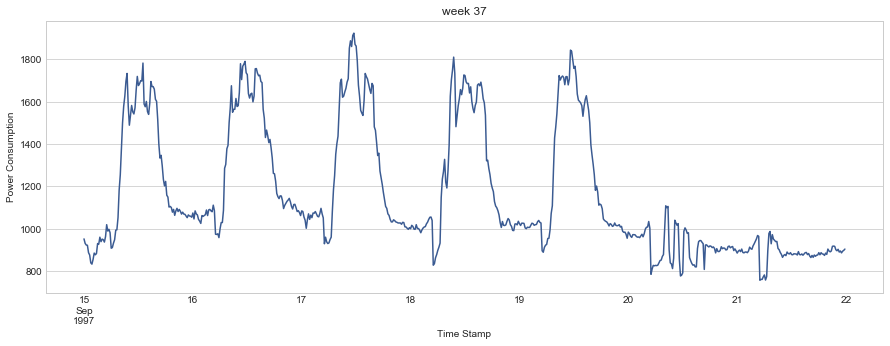

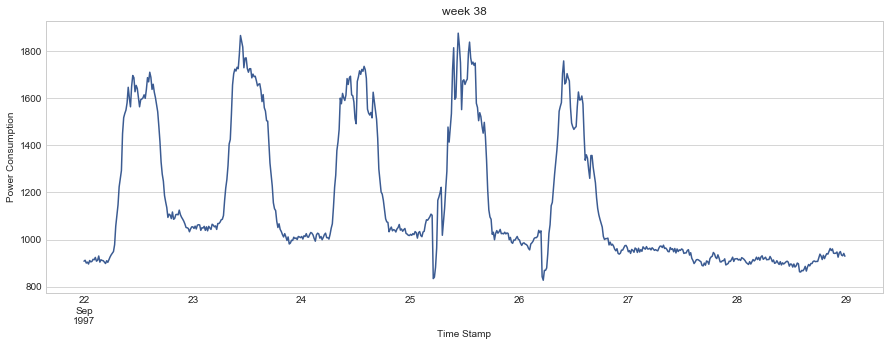

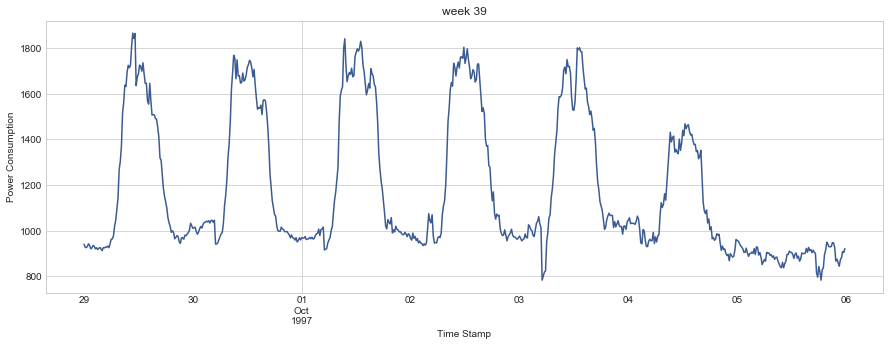

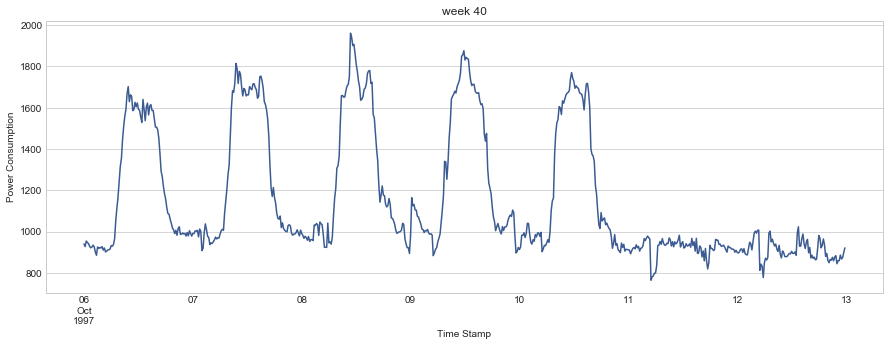

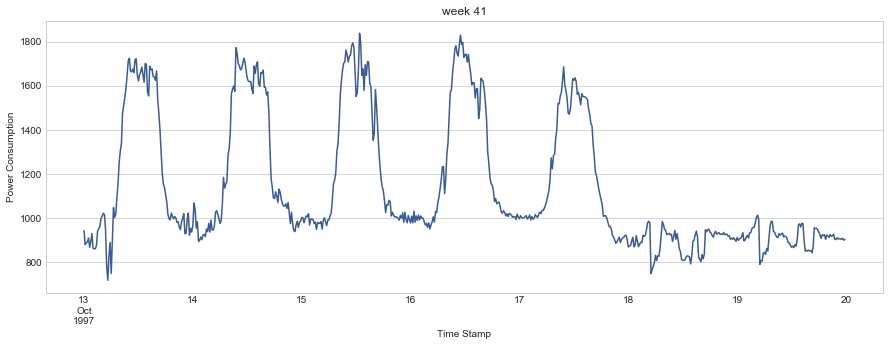

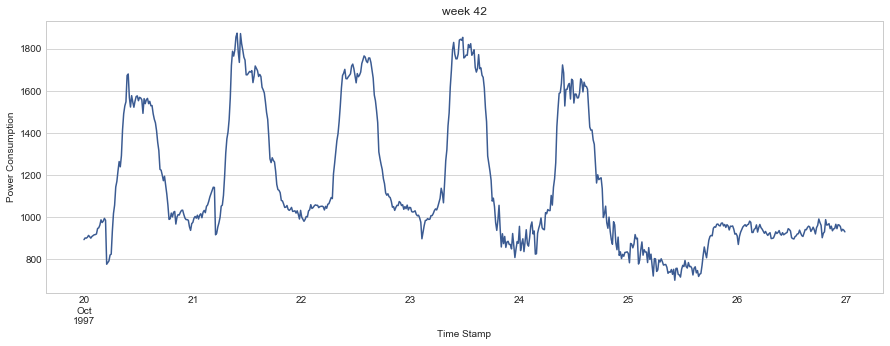

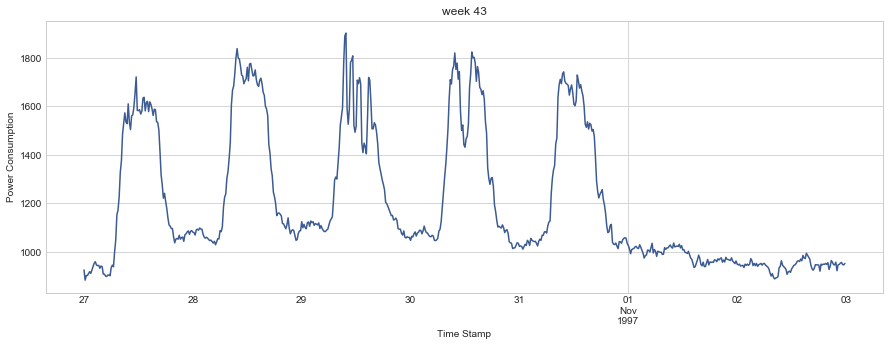

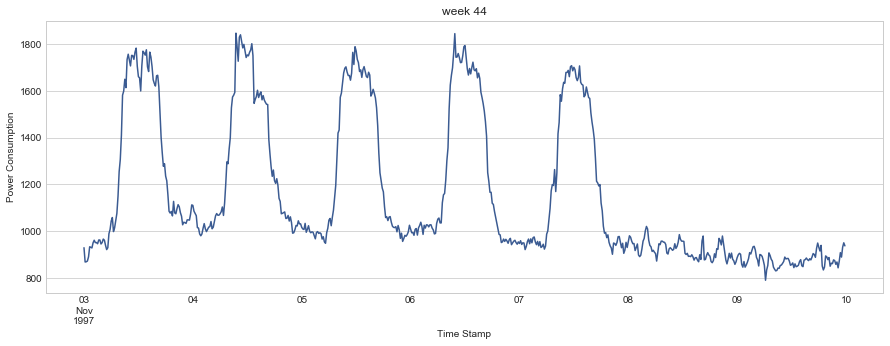

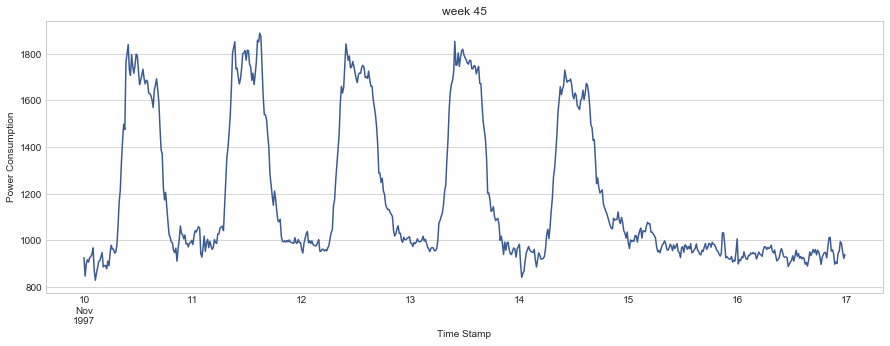

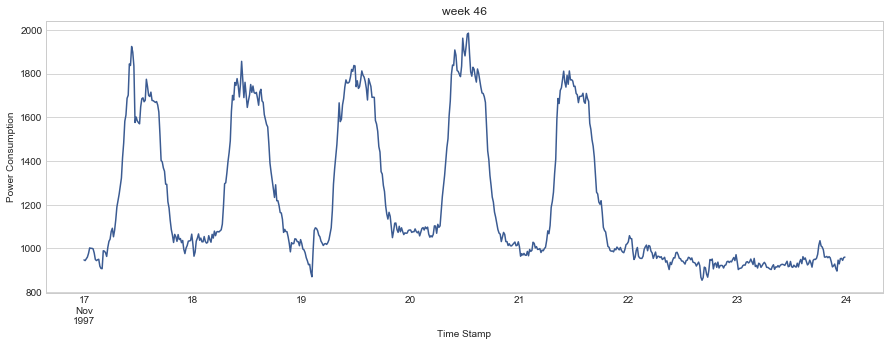

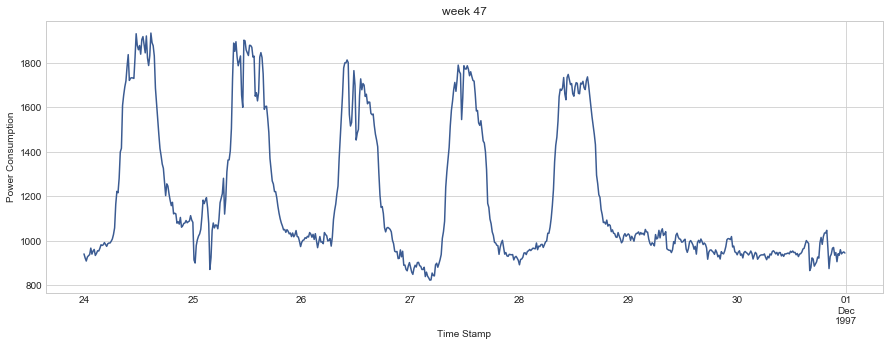

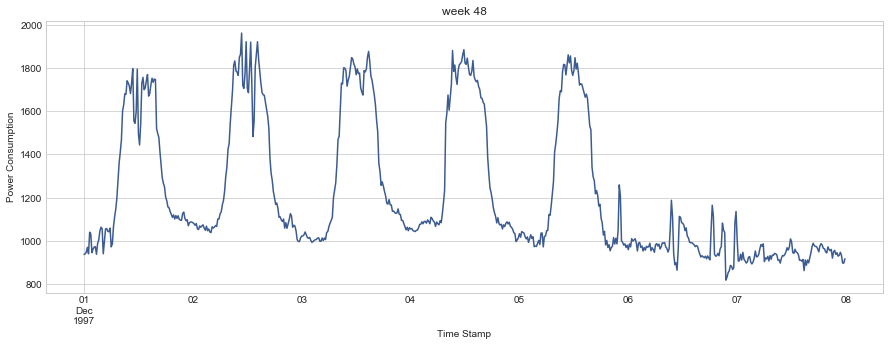

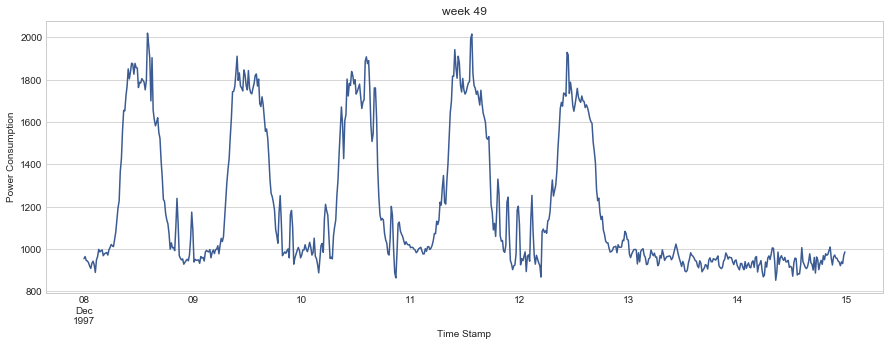

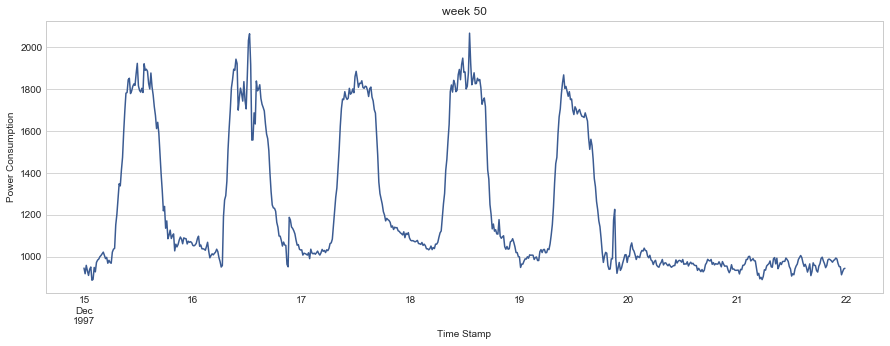

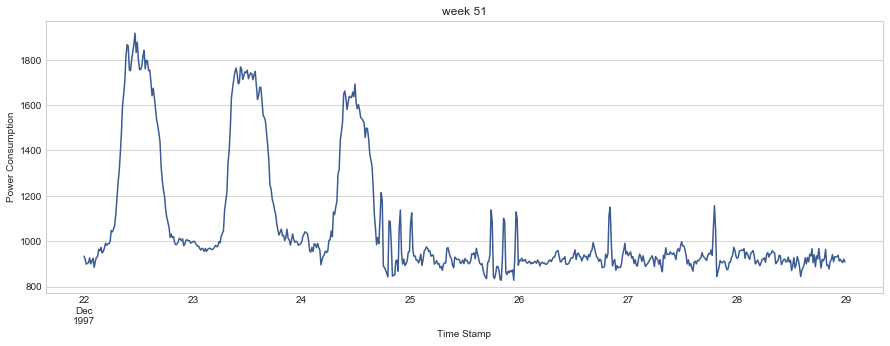

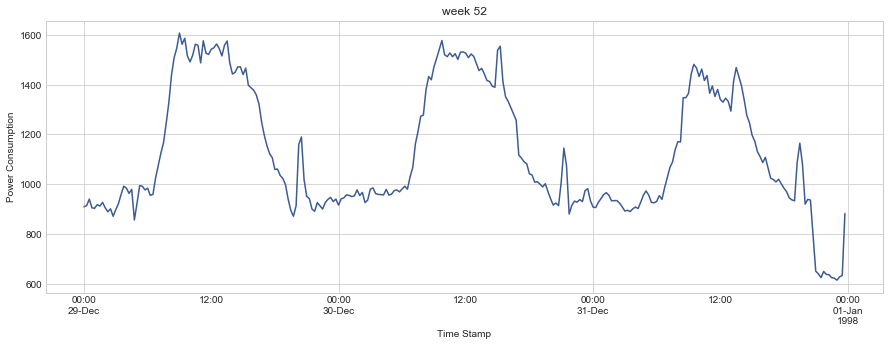

In [93]:
#iterate over a week. a week will have 672 values
step = 672

for i in range(0,df.shape[0],step):
    fig = plt.figure(figsize=(15,5))
    tmp = df[i:i+step]['consumption'].plot(color=sns.xkcd_rgb["denim blue"])
    plt.title("week %s"%(i/step +1))
    plt.xlabel('Time Stamp')
    plt.ylabel('Power Consumption')
    plt.show()


In [97]:
anomaly_weeks = [12,13,17,18,20,39,51]
validation_weeks = [10,11]
test_weeks = [12,13,14,15,16,17,18,19,20]
train_weeks = [1,2,3,4,5,6,7,8,9]

df_train_list = []
df_valid_list = []
df_test_list = []

'''
for i in range(0,df.shape[0],step):
    week = i/step +1
    if week in validation_weeks:
        df_valid_list.append(df[i:i+step])  
    elif week in test_weeks:
        if week in anomaly_weeks:
            df[i:i+step]['anomaly'] =1
        df_test_list.append(df[i:i+step])
    elif week in train_weeks:
        df_train_list.append(df[i:i+step])
'''  
lookback = 24
# add lookback data points for stateful lstm

df_train = df[(train_weeks[0]-1)*step: (train_weeks[-1])*step +lookback]
df_validation = df[(validation_weeks[0]-1)*step: (validation_weeks[-1])*step +lookback]
df_test = df[(test_weeks[0]-1)*step: (test_weeks[-1])*step +lookback]


In [98]:
#df_train = pd.concat(df_train_list)
#df_test = pd.concat(df_test_list)
#df_validation = pd.concat(df_valid_list)
df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation'] = df_validation


Size of test: 6072
Size of train: 6072
Size of validation: 1368
Total: 13512
Ratio of test: 0.449378
Ratio of train: 0.449378
Ratio of validation: 0.101243


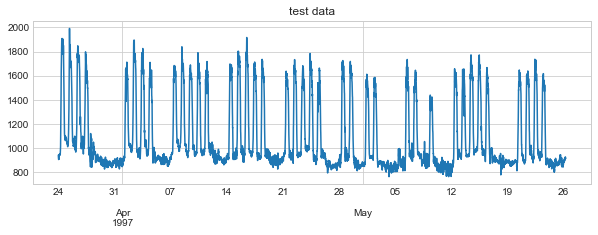

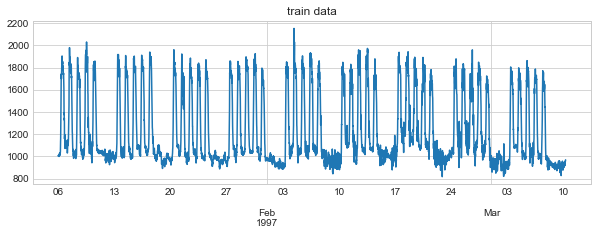

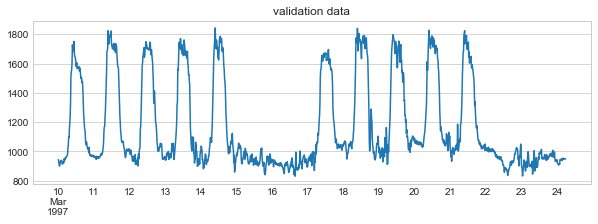

In [100]:
count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

for key in df_dict:
    _, ax = plt.subplots()
    df_tmp = df_dict[key]
    df_tmp['consumption'].plot(figsize=(10,3))
    #rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    #for row in rows:
    #    plt.plot(row[0], row[1], 'r.', markersize=5.0)
    #plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [101]:
for key in df_dict:
    np.save("resources/data/discords/dutch_power/%s"%(key),df_dict[key])